# Santander Customer Transaction Prediction

About the CUSTOMER: Santander Bank is a wholly owned subsidiary of Spanish Santander Group. It is headquartered at Boston, Massachusetts, United States.

About the DATASET: It is an anonymized dataset containing numeric feature variables. Since, it is confidential financial data, it is completely masked. We don't have the variables name or a data dictionary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r"C:\Users\RISHI MUKUNTHAN\Desktop\Data Science\Projects\Edwisor_Santander_Customer_Transaction\train.csv")
df_test = pd.read_csv(r"C:\Users\RISHI MUKUNTHAN\Desktop\Data Science\Projects\Edwisor_Santander_Customer_Transaction\test.csv")

In [3]:
df_train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df_test.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
#Drop ID column
df_train.drop('ID_code', axis=1, inplace = True)
df_test.drop('ID_code', axis=1, inplace = True)

In [6]:
print(f"Train Dataset Shape{df_train.shape}")

Train Dataset Shape(200000, 201)


In [7]:
print(f"Test Dataset Shape{df_test.shape}")

Test Dataset Shape(200000, 200)


We have 200 variables. This dataset is highly dimensional, so rigorous feature engineering techniques should be applied to sidestep the curse of dimensionality. Using Dimensionality Reduction techniques like PCA or LDA should help deal with this problem. LDA should be a better choice since it is a supervised approach whereas PCA is unsupervised approach. Furthermore, it focuses on maximizing class separation whereas PCA focuses on finding the component axes that maximize the variance.

## Check Target Class Imbalance

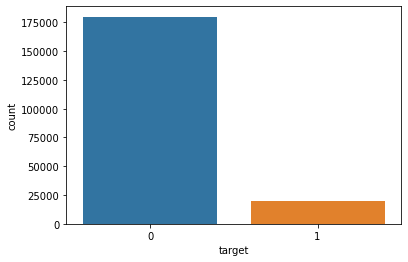

In [44]:
sns.countplot(df_train['target'])
plt.savefig("Target_Class_Imbalance.png")

In [9]:
#Normalize=True returns in percentage else we get count
df_train['target'].value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

We have 2 lakh observations of which around 90 percent of data points belong to class 0 and only 10 percent belong to class 1. This target class imbalance problem might make our model biased towards class 0. Since,the data is pretty huge, we can afford to drop observations belonging to class 0 and make a dataset with 75% class 0 and 25% class 1. We don't have to aim for 50/50 since most tree based algorithms like Random Forest, XGBoost are well capable of dealing with imbalanced datasets.

## Missing Value Analysis

In [10]:
#Variables with Missing Value percentage
df_train.apply(lambda x: sum(x.isnull())).sort_values(axis=0,ascending=False)

var_199    0
var_61     0
var_71     0
var_70     0
var_69     0
          ..
var_129    0
var_128    0
var_127    0
var_126    0
target     0
Length: 201, dtype: int64

In [11]:
df_test.apply(lambda x: sum(x.isnull())).sort_values(axis=0,ascending=False)

var_199    0
var_62     0
var_72     0
var_71     0
var_70     0
          ..
var_130    0
var_129    0
var_128    0
var_127    0
var_0      0
Length: 200, dtype: int64

There are no missing values present in this dataset.

## Outliers and Distributions of features

Since this is a high dimensional dataset with 200 variables with no variable name/information, 
analysing the boxplots or distribution plots of 200 features is not feasible and won't help in 
deriving any meaningful insights about the data.

In [25]:
# Let's go ahead and analyse the distributions of few variables
def show_distribution(df, features):
    i = 0
    plt.figure()
    fig, ax = plt.subplots(10,5, figsize=(20,25))

    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.distplot(df[feature])
        plt.xlabel(feature, fontsize=10)
        locs, labels = plt.xticks() #Get locations and labels
        plt.tick_params(axis='x', labelsize=7, pad=0)
    plt.savefig("Distribution_Plot.png")
    plt.show()

<Figure size 432x288 with 0 Axes>

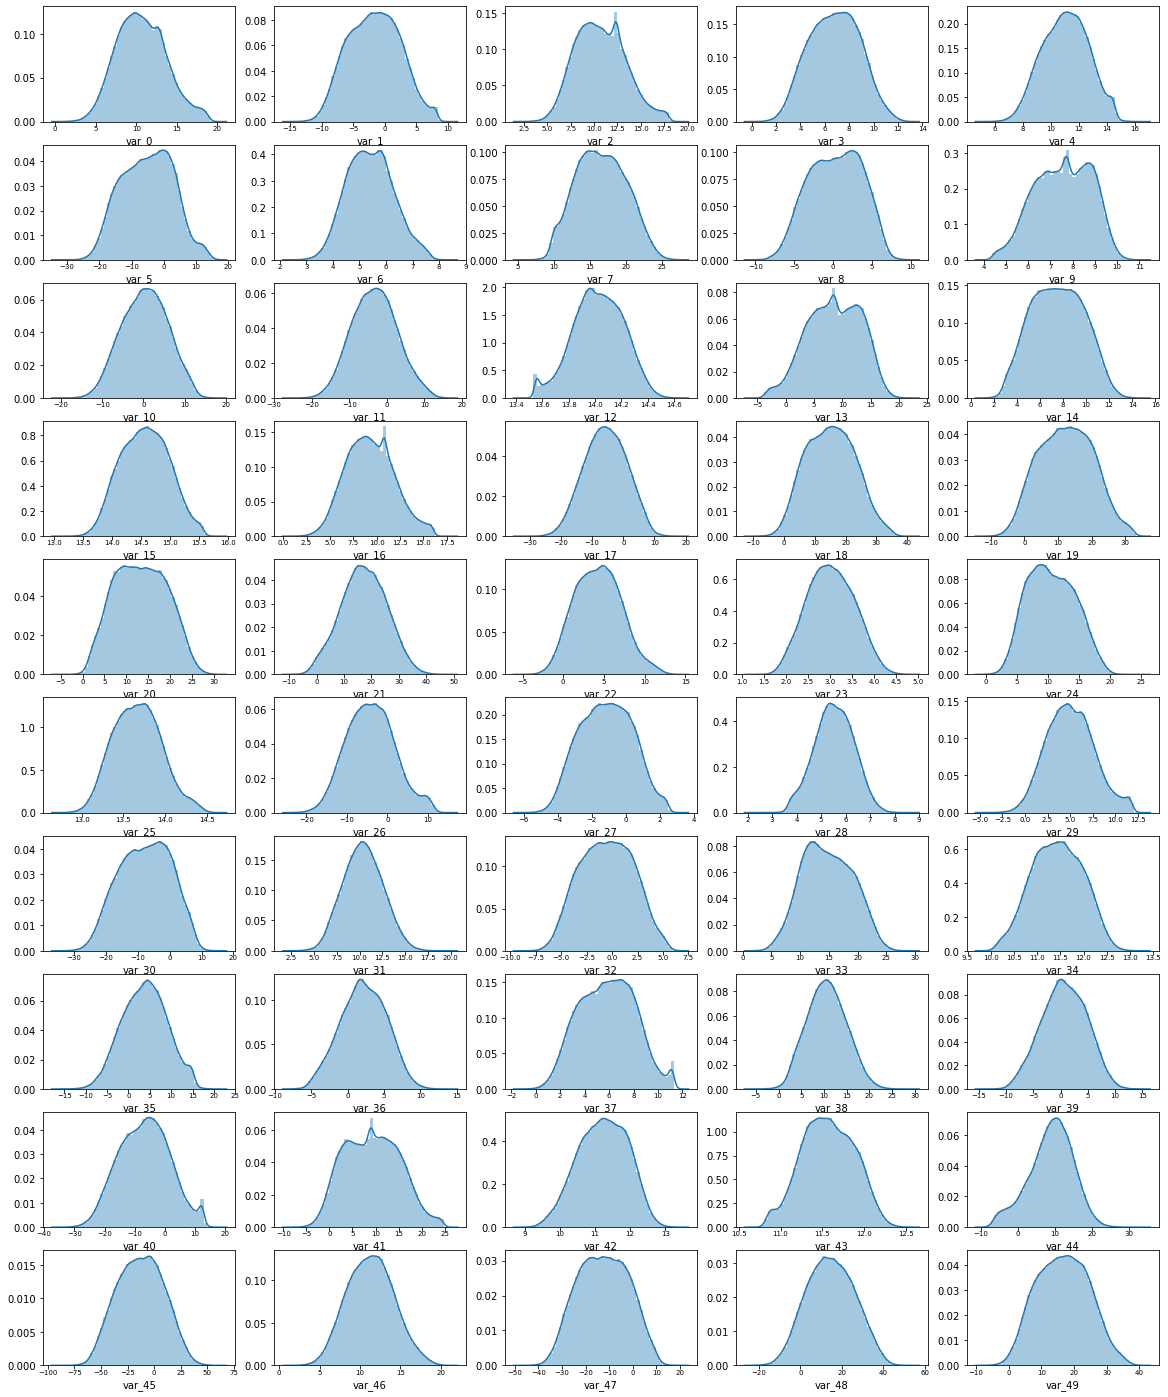

In [26]:
features = df_train.columns.values[1:51]
show_distribution(df_train,features)

In [27]:
def plot_boxplot(df, features):
    i = 0
    plt.figure()
    fig, ax = plt.subplots(10,5, figsize=(20,25))
    
    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.boxplot(df[feature])
        plt.xlabel(feature, fontsize=10)
        locs, labels = plt.xticks() #Get locations and labels
        plt.tick_params(axis='x', labelsize=6, pad=-5)
    plt.savefig("Box_Plot.png")
    plt.show()

<Figure size 432x288 with 0 Axes>

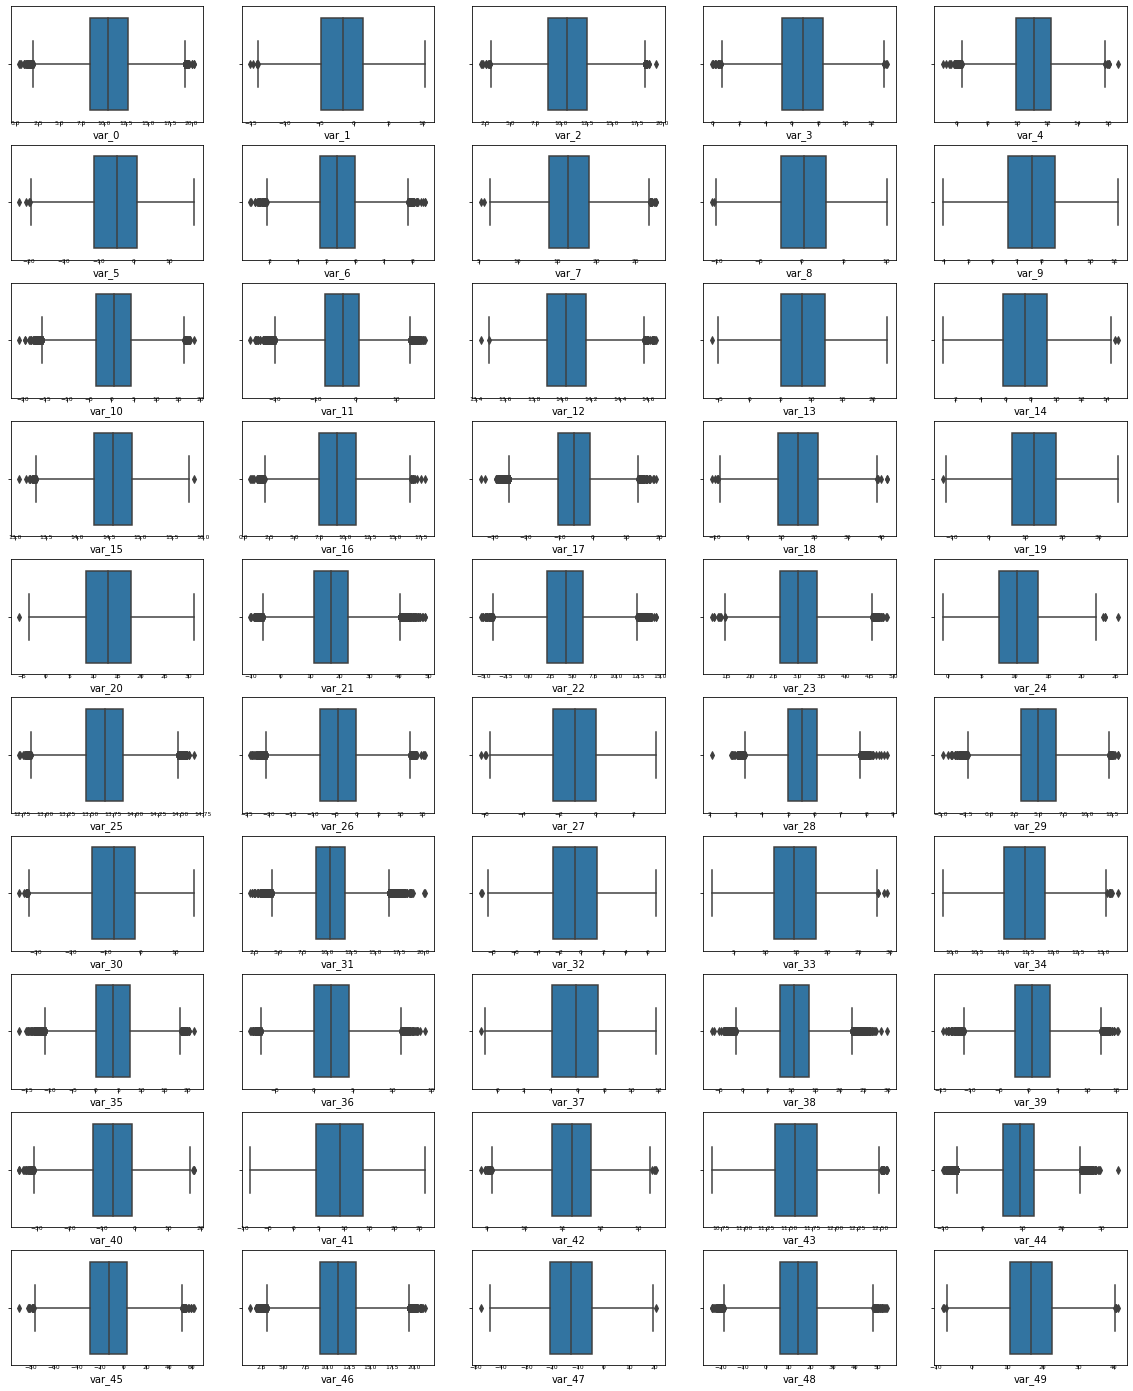

In [28]:
features = df_train.columns.values[1:51]
plot_boxplot(df_train,features)

### Outlier Removal Using Z-Score Method

In [29]:
from scipy import stats
z_scores = stats.zscore(df_train)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_out_Z = df_train[filtered_entries]

In [30]:
df_train.shape

(200000, 201)

In [31]:
df_out_Z.shape

(188969, 201)

In [32]:
df_out_Z['target'].value_counts()

0    170143
1     18826
Name: target, dtype: int64

In [33]:
df_out_Z['target'].value_counts(normalize=True)

0    0.900375
1    0.099625
Name: target, dtype: float64

### Outlier Removal Using IQR(Inter Quartile Range)

In [34]:
Q1 = df_train.iloc[:,1:200].quantile(0.25)
Q3 = df_train.iloc[:,1:200].quantile(0.75)
IQR = Q3 - Q1

In [35]:
df_out_IQR = df_train[~((df_train.iloc[:,1:200] < (Q1 - 1.5 * IQR)) |(df_train.iloc[:,1:200] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [36]:
df_out_IQR['target'].value_counts()

0    158013
1     17108
Name: target, dtype: int64

In [37]:
df_out_IQR['target'].value_counts(normalize=True)

0    0.902308
1    0.097692
Name: target, dtype: float64

## Correlation Analysis

In [38]:
dfcorr = df_train.corr()

In [39]:
dfcorr

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


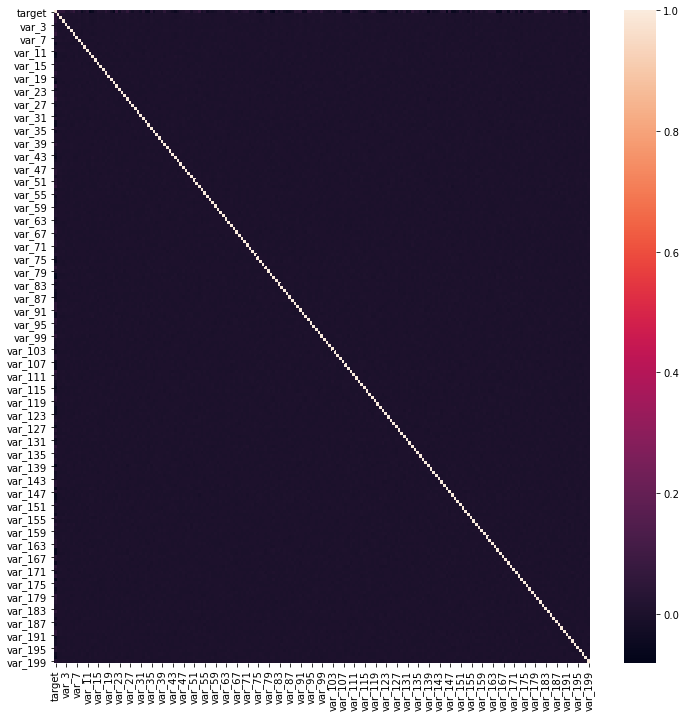

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(dfcorr)
plt.savefig("Correlation HeatMap.png")

Visualizing a heatmap for 200 variables is not much useful. Instead we can print any variables which are highly correlated with any other features.

In [41]:
dfcorr[(dfcorr!=1) & (abs(dfcorr)>0.1)].count().sort_values(axis=0,ascending=False)

var_199    0
var_61     0
var_71     0
var_70     0
var_69     0
          ..
var_129    0
var_128    0
var_127    0
var_126    0
target     0
Length: 201, dtype: int64

There is absolutely no multicollinearity in this dataset. Absolute value of correlation is less than 0.1 for all elements in the correlation matrix except for the correlation between the variable and itself which is 1. Even the features are not much correlated with the target variable. Feature selection will be extremely difficult, so we can maybe hope to do feature extraction through dimensionality reduction technique like PCA/LDA if it works.

### There seems to be outlier observations in both target classes.  From our correlation analysis also, we couldn't conclude on any one feature that predominantly influences the target class but the features only as a whole influence the target. Removing outliers leads to removal of observations from both classes which further increases the target class imbalance. 

### Since there is no collineariy between any of the 200 variables in seems like we have been provided with well preprocessed data. So the outliers might not be human errors rather could be meaningful information. So we decide not to remove outliers.

### Since this is a huge dataset with 2 lakh observations, there could be duplicates. Let us check and remove them if any.

In [42]:
df_train[df_train.loc[:,:].duplicated()]

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


In [43]:
df_test[df_test.loc[:,:].duplicated()]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
